In [1]:
import pickle as pc
import numpy as np
import matplotlib.pyplot as pp
import processing
import scipy.optimize as so
import pandas as pd

processing.DenormalizedSimulation

export_graphs = True

pickle_path = '/home/jachym/SPICEdata/EmxwPTe.pickle'
pickle_path2 = '/home/jachym/SPICEdata/EmxwrectP.pickle'
pickle_path3 = '/home/jachym/SPICEdata/EmxwsqP.pickle'
pickle_path4 = '/home/jachym/SPICEdata/EmxwrsqP.pickle'
with open(pickle_path, 'rb') as f:
    data = pc.load(f)
with open(pickle_path2, 'rb') as f:
    dataR = pc.load(f)
with open(pickle_path3, 'rb') as f:
    dataS = pc.load(f)
with open(pickle_path4, 'rb') as f:
    dataRS = pc.load(f)
dfC = pd.read_csv('probe_widths.csv', sep=';')
dfR = pd.read_csv('probe_widthsR.csv', sep=';')
dfS = pd.read_csv('probe_widthsS.csv', sep=';')

In [2]:
def process_data(data):
    KtoeV = 8.617e-5
    df = pd.DataFrame(columns=['Ie', 'Ii', 'IPfluxe', 'IPfluxi', 'pot', 'Te', 'B', 'G01', 'G02', 'G03', 'G04'])
    i = 0
    for d in data:
        df.loc[i] = [d['Ie'], d['Ii'], d['IPfluxe'], d['IPfluxi'], d['pot'], round(d['Te']*KtoeV,1), d['B'], d['G01'], d['G02'], d['G03'], d['G04']]
        i += 1
    df['I'] = df['Ie']+df['Ii']
    df['IPflux'] = df['IPfluxi']+df['IPfluxe']
    return df


In [3]:
circleProbeDF = process_data(data)
rectProbeDF = process_data(dataR)
squareProbeDF = process_data(dataS)
RsquareProbeDF = process_data(dataRS)

In [4]:
probe_Is, sigma = [], []
kB = 1.3806e-23
e = 1.6021e-19
n0 = 1e18
amu = 1.6e-27
eps0 = 8.854e-12
KtoeV = 8.617e-5
mi = 2*amu
qi = e

def IfromA(A, Te):
    TeK = Te/KtoeV
    lamD = np.sqrt((eps0*kB*TeK)/(n0*e**2))
    rA = A*lamD**2
    cs = np.sqrt(2*kB*TeK/mi)
    return rA*qi*n0*cs, lamD

In [5]:
def get_current_lambdaD(df):
    probe_Is, sigma = [], []
    for i in range(len(df['Width'])):
        Ii, lamD = IfromA(df['Width'][i], df['Te'][i])
        probe_Is.append(Ii)
        sigma.append(lamD)
    df['Current'] = probe_Is
    df['LambdaD'] = sigma
    return df

In [6]:
dfC = get_current_lambdaD(dfC)
dfR = get_current_lambdaD(dfR)
dfS = get_current_lambdaD(dfS)
TesdfC = dfC["Te"].unique()
TesdfR = dfR["Te"].unique()
TesdfS = dfS["Te"].unique()

dfR.head()

,Voltage,Te,Type,Width,Current,LambdaD
0,-10,10,1,62,0.000174,0.000024
1,-6,10,1,57,0.000160,0.000024
2,-4,10,1,53,0.000149,0.000024
3,-2,10,1,46,0.000129,0.000024
4,-2,10,-1,48,0.000134,0.000024


In [7]:
TesC = circleProbeDF["Te"].unique()
TesR = rectProbeDF["Te"].unique()
TesS = squareProbeDF["Te"].unique()
TesRS = RsquareProbeDF["Te"].unique()
TesC.sort()
TesR.sort()
TesS.sort()
TesRS.sort()

print('------ Tes ------')
print(f'Circle probe: {TesC}')
print(f'Rectangle probe: {TesR}')
print(f'Square probe: {TesS}')
print(f'Rotated square probe: {TesRS}')

------ Tes ------
Circle probe: [ 5.  10.  12.5 15.  17.5 20.  30.  40. ]
Rectangle probe: [ 5. 10. 15. 20.]
Square probe: [ 5. 10. 15. 20.]
Rotated square probe: [ 5. 10. 15. 20.]


In [8]:
def VA_func(v, Isat, Vfl, Te, alpha):
    return Isat*(1-np.exp((v-Vfl)/Te)-alpha*(v-Vfl)/Te)

def VA_funcI(v, Isat, Vfl, alpha):
    return Isat*(1-alpha*(v-Vfl))

In [9]:
def fit_DF_normal(DF):
    result_df = pd.DataFrame(columns=['rTe', 'Isat', 'Vfl', 'Te', 'alpha', 'error'])
    i = 0
    for te in DF['Te'].unique():
        df = DF[DF['Te'] == te]
        I = df['I']
        V = df['pot']
        popt, pcov = so.curve_fit(VA_func, V, I, p0=[1e-4, -3, 1, 3e-6])
        result_df.loc[i] = [te, popt[0], popt[1], popt[2], popt[3], np.sqrt(np.diag(pcov))]
        i += 1
    return result_df

In [10]:
fitDfC = fit_DF_normal(circleProbeDF)
fitDfR = fit_DF_normal(rectProbeDF)
fitDfS = fit_DF_normal(squareProbeDF)
fitDfRS = fit_DF_normal(RsquareProbeDF)

### Voltamperova charakteristika

Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Co

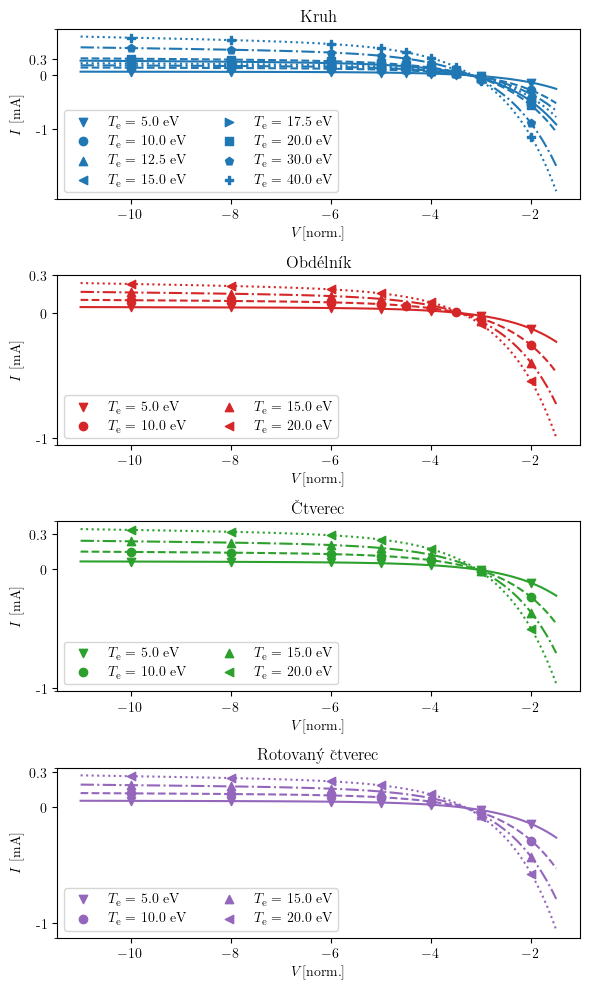

In [11]:
fig, axs = pp.subplots(4,1,figsize=(6,10))
xaxis = np.linspace(-11, -1.5, 100)
markers = ['v', 'o', '^', '<', '>', 's', 'p', 'P', '*', 'h', 'H', 'X', 'D', 'd']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
linestyles = ['-', '--', '-.', ':']

def set_ax(ax, title):
    ax.set_xlabel(r'$V[\mathrm{norm.}]$')
    ax.set_ylabel(r'$I$ [mA]')
    ax.set_yscale('symlog')
    ax.set_yticks([-1e-3, 0, 3e-4], ["-1", "0", r"0.3"])
    ax.set_title(title)
    ax.legend(ncol=2)

for Te, i in zip(TesC, range(len(TesC))):
    axs[0].scatter(circleProbeDF[circleProbeDF['Te']==Te]['pot'], circleProbeDF[circleProbeDF['Te']==Te]['I'], 
               marker=markers[i], c='tab:blue', label=r"$T_\mathrm{e} =$"+ f' {str(Te)} eV')
    tedf = fitDfC[fitDfC['rTe']==Te]
    axs[0].plot(xaxis, VA_func(xaxis, tedf['Isat'].iloc[0], tedf['Vfl'].iloc[0], tedf['Te'].iloc[0], tedf['alpha'].iloc[0]), 
            c='tab:blue', linestyle=linestyles[i%4])
    set_ax(axs[0], 'Kruh')

for Te, i in zip(TesR, range(len(TesR))):
    axs[1].scatter(rectProbeDF[rectProbeDF['Te']==Te]['pot'], rectProbeDF[rectProbeDF['Te']==Te]['I'], 
               marker=markers[i], c='tab:red', label=r"$T_\mathrm{e} =$"+ f' {str(Te)} eV')
    tedf = fitDfR[fitDfR['rTe']==Te]
    axs[1].plot(xaxis, VA_func(xaxis, tedf['Isat'].iloc[0], tedf['Vfl'].iloc[0], tedf['Te'].iloc[0], tedf['alpha'].iloc[0]),
            c='tab:red', linestyle=linestyles[i%4])
    set_ax(axs[1], 'Obdélník')

for Te, i in zip(TesS, range(len(TesS))):
    axs[2].scatter(squareProbeDF[squareProbeDF['Te']==Te]['pot'], squareProbeDF[squareProbeDF['Te']==Te]['I'], 
               marker=markers[i], c='tab:green', label=r"$T_\mathrm{e} =$"+ f' {str(Te)} eV')
    tedf = fitDfS[fitDfS['rTe']==Te]
    axs[2].plot(xaxis, VA_func(xaxis, tedf['Isat'].iloc[0], tedf['Vfl'].iloc[0], tedf['Te'].iloc[0], tedf['alpha'].iloc[0]),
            c='tab:green', linestyle=linestyles[i%4])
    set_ax(axs[2], 'Čtverec')

for Te, i in zip(TesRS, range(len(TesRS))):
    axs[3].scatter(RsquareProbeDF[RsquareProbeDF['Te']==Te]['pot'], RsquareProbeDF[RsquareProbeDF['Te']==Te]['I'], 
               marker=markers[i], c='tab:purple', label=r"$T_\mathrm{e} =$"+ f' {str(Te)} eV')
    tedf = fitDfRS[fitDfRS['rTe']==Te]
    axs[3].plot(xaxis, VA_func(xaxis, tedf['Isat'].iloc[0], tedf['Vfl'].iloc[0], tedf['Te'].iloc[0], tedf['alpha'].iloc[0]),
            c='tab:purple', linestyle=linestyles[i%4])
    set_ax(axs[3], 'Rotovaný čtverec')

pp.tight_layout()
if export_graphs: pp.savefig('/home/jachym/Temporary/graph_export/VA_fits.pgf', format='pgf')
pp.show()

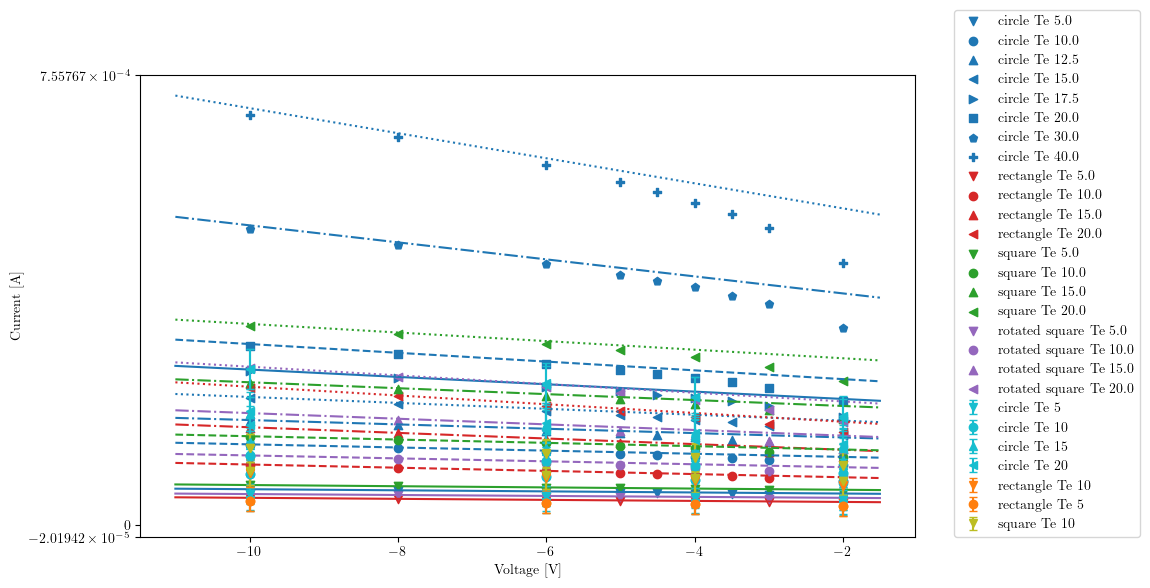

In [12]:
fig, ax = pp.subplots(figsize=(10,6))
xaxis = np.linspace(-11, -1.5, 100)
markers = ['v', 'o', '^', '<', '>', 's', 'p', 'P', '*', 'h', 'H', 'X', 'D', 'd']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
linestyles = ['-', '--', '-.', ':']

for Te, i in zip(TesC, range(len(TesC))):
    ax.scatter(circleProbeDF[circleProbeDF['Te']==Te]['pot'], circleProbeDF[circleProbeDF['Te']==Te]['Ii'], 
               marker=markers[i], c='tab:blue', label=f'circle Te {str(Te)}')
    tedf = fitDfC[fitDfC['rTe']==Te]
    ax.plot(xaxis, VA_funcI(xaxis, tedf['Isat'].iloc[0], tedf['Vfl'].iloc[0], tedf['alpha'].iloc[0]), 
            c='tab:blue', linestyle=linestyles[i%4])
for Te, i in zip(TesR, range(len(TesR))):
    ax.scatter(rectProbeDF[rectProbeDF['Te']==Te]['pot'], rectProbeDF[rectProbeDF['Te']==Te]['Ii'], 
               marker=markers[i], c='tab:red', label=f'rectangle Te {str(Te)}')
    tedf = fitDfR[fitDfR['rTe']==Te]
    ax.plot(xaxis, VA_funcI(xaxis, tedf['Isat'].iloc[0], tedf['Vfl'].iloc[0], tedf['alpha'].iloc[0]),
            c='tab:red', linestyle=linestyles[i%4])
for Te, i in zip(TesS, range(len(TesS))):
    ax.scatter(squareProbeDF[squareProbeDF['Te']==Te]['pot'], squareProbeDF[squareProbeDF['Te']==Te]['Ii'], 
               marker=markers[i], c='tab:green', label=f'square Te {str(Te)}')
    tedf = fitDfS[fitDfS['rTe']==Te]
    ax.plot(xaxis, VA_funcI(xaxis, tedf['Isat'].iloc[0], tedf['Vfl'].iloc[0], tedf['alpha'].iloc[0]),
            c='tab:green', linestyle=linestyles[i%4])
for Te, i in zip(TesRS, range(len(TesRS))):
    ax.scatter(RsquareProbeDF[RsquareProbeDF['Te']==Te]['pot'], RsquareProbeDF[RsquareProbeDF['Te']==Te]['Ii'], 
               marker=markers[i], c='tab:purple', label=f'rotated square Te {str(Te)}')
    tedf = fitDfRS[fitDfRS['rTe']==Te]
    ax.plot(xaxis, VA_funcI(xaxis, tedf['Isat'].iloc[0], tedf['Vfl'].iloc[0], tedf['alpha'].iloc[0]),
            c='tab:purple', linestyle=linestyles[i%4])


for Te, i in zip(TesdfC, range(len(TesdfC))):
    ax.errorbar(dfC['Voltage'][dfC['Te'] == Te], dfC['Current'][dfC['Te'] == Te]/2, yerr=dfC['LambdaD'][dfC['Te'] == Te], 
                fmt=markers[i], c='tab:cyan', label=f'circle Te {str(Te)}', capsize=3)

for Te, i in zip(TesdfR, range(len(TesdfR))):
    ax.errorbar(dfR['Voltage'][dfR['Te'] == Te], dfR['Current'][dfR['Te'] == Te]/2, yerr=dfR['LambdaD'][dfR['Te'] == Te], 
                fmt=markers[i], c='tab:orange', label=f'rectangle Te {str(Te)}', capsize=3)

for Te, i in zip(TesdfS, range(len(TesdfS))):
    ax.errorbar(dfS['Voltage'][dfS['Te'] == Te], dfS['Current'][dfS['Te'] == Te]/2, yerr=dfS['LambdaD'][dfS['Te'] == Te], 
                fmt=markers[i], c='tab:olive', label=f'square Te {str(Te)}', capsize=3)

ax.set_xlabel('Voltage [V]')
ax.set_ylabel('Current [A]')
ax.set_yscale('symlog')
pp.legend(loc=(1.05,0.0))
pp.show()

In [13]:
fitCoeffC, covar = so.curve_fit(lambda t,a: a/t**0.5, fitDfC['rTe'], fitDfC['alpha']/fitDfC['rTe'])
fitErrC = np.sqrt(np.diag(covar))
print(fitCoeffC[0],'+-', fitErrC[0])
fitCoeffR, covar = so.curve_fit(lambda t,a: a/t**0.5, fitDfR['rTe'], fitDfR['alpha']/fitDfR['rTe'])
fitErrR = np.sqrt(np.diag(covar))
fitCoeffS, covar = so.curve_fit(lambda t,a: a/t**0.5, fitDfS['rTe'], fitDfS['alpha']/fitDfS['rTe'])
fitErrS = np.sqrt(np.diag(covar))
fitCoeffRS, covar = so.curve_fit(lambda t,a: a/t**0.5, fitDfRS['rTe'], fitDfRS['alpha']/fitDfRS['rTe'])
fitErrRS = np.sqrt(np.diag(covar))

0.007070202241047162 +- 0.00017184152155457782


Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Co

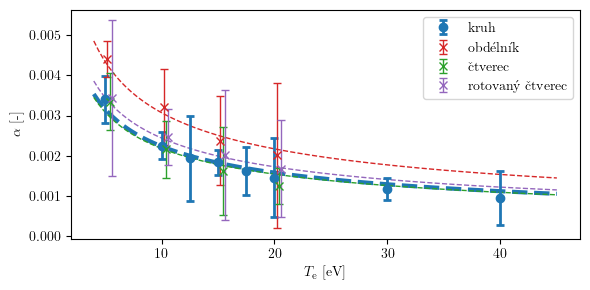

In [14]:
xaxis = np.linspace(4, 45, 100)

pp.rcParams['text.usetex'] = True

fig, ax = pp.subplots(figsize=(6,3))

ax.plot(xaxis, fitCoeffC[0]/xaxis**0.5, c='tab:blue', linestyle='--', linewidth=3)
ax.plot(xaxis, fitCoeffR[0]/xaxis**0.5, c='tab:red', linestyle='--', linewidth=1)
ax.plot(xaxis, fitCoeffS[0]/xaxis**0.5, c='tab:green', linestyle='--', linewidth=1)
ax.plot(xaxis, fitCoeffRS[0]/xaxis**0.5, c='tab:purple', linestyle='--', linewidth=1)

#pp.plot(xaxis, linC[0]*xaxis, c='tab:blue', linestyle=':')
#pp.plot(xaxis, linR[0]*xaxis, c='tab:red', linestyle=':')
#pp.plot(xaxis, linS[0]*xaxis, c='tab:green', linestyle=':')
#pp.plot(xaxis, linRS[0]*xaxis, c='tab:purple', linestyle=':')
ax.errorbar(fitDfC['rTe'], fitDfC['alpha']/fitDfC['rTe'], yerr=fitDfC['error'].apply(lambda x: x[3]), c='tab:blue', label='kruh', fmt='o', capsize=3, elinewidth=2, capthick=2)
ax.errorbar(fitDfR['rTe']+0.2, fitDfR['alpha']/fitDfR['rTe'], yerr=fitDfR['error'].apply(lambda x: x[3]), c='tab:red', label='obdélník',  fmt='x', linewidth=1, capsize=3)
ax.errorbar(fitDfS['rTe']+0.4, fitDfS['alpha']/fitDfS['rTe'], yerr=fitDfS['error'].apply(lambda x: x[3]), c='tab:green', label='čtverec',  fmt='x', linewidth=1, capsize=3)
ax.errorbar(fitDfRS['rTe']+0.6, fitDfRS['alpha']/fitDfRS['rTe'], yerr=fitDfRS['error'].apply(lambda x: x[3]), c='tab:purple', label='rotovaný čtverec',  fmt='x', linewidth=1, capsize=3)
ax.set_xlabel(r"$T_\mathrm{e}$ [eV]")
ax.set_ylabel(r'$\alpha$ [-]')
ax.legend()
pp.tight_layout()
if export_graphs: pp.savefig('/home/jachym/Temporary/graph_export/alpha_Te.pgf', format='pgf')
pp.show()

Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Computer Modern
Ignoring unknown font: Co

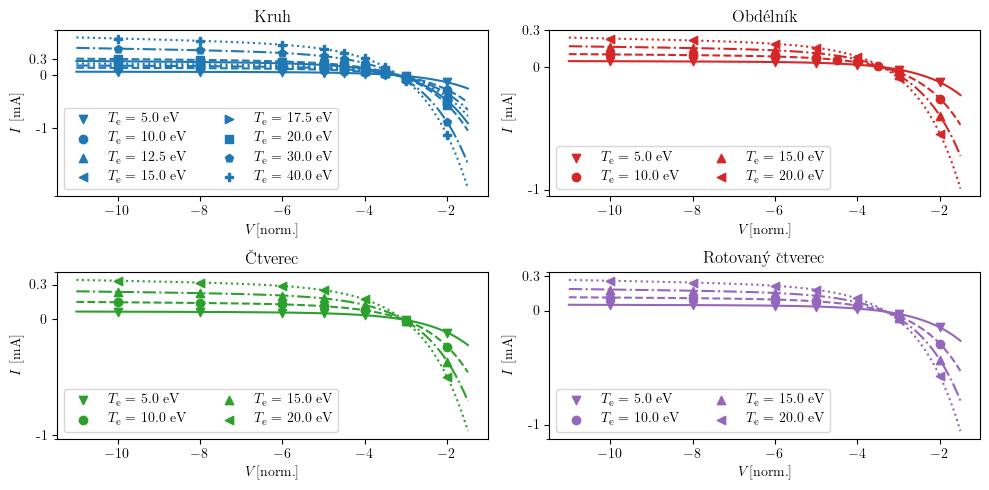

In [18]:
fig, axs = pp.subplots(2,2,figsize=(10,5))
xaxis = np.linspace(-11, -1.5, 100)
markers = ['v', 'o', '^', '<', '>', 's', 'p', 'P', '*', 'h', 'H', 'X', 'D', 'd']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
linestyles = ['-', '--', '-.', ':']

def set_ax(ax, title):
    ax.set_xlabel(r'$V[\mathrm{norm.}]$')
    ax.set_ylabel(r'$I$ [mA]')
    ax.set_yscale('symlog')
    ax.set_yticks([-1e-3, 0, 3e-4], ["-1", "0", r"0.3"])
    ax.set_title(title)
    ax.legend(ncol=2)

for Te, i in zip(TesC, range(len(TesC))):
    axs[0,0].scatter(circleProbeDF[circleProbeDF['Te']==Te]['pot'], circleProbeDF[circleProbeDF['Te']==Te]['I'], 
               marker=markers[i], c='tab:blue', label=r"$T_\mathrm{e} =$"+ f' {str(Te)} eV')
    tedf = fitDfC[fitDfC['rTe']==Te]
    axs[0,0].plot(xaxis, VA_func(xaxis, tedf['Isat'].iloc[0], tedf['Vfl'].iloc[0], tedf['Te'].iloc[0], tedf['alpha'].iloc[0]), 
            c='tab:blue', linestyle=linestyles[i%4])
    set_ax(axs[0,0], 'Kruh')

for Te, i in zip(TesR, range(len(TesR))):
    axs[0,1].scatter(rectProbeDF[rectProbeDF['Te']==Te]['pot'], rectProbeDF[rectProbeDF['Te']==Te]['I'], 
               marker=markers[i], c='tab:red', label=r"$T_\mathrm{e} =$"+ f' {str(Te)} eV')
    tedf = fitDfR[fitDfR['rTe']==Te]
    axs[0,1].plot(xaxis, VA_func(xaxis, tedf['Isat'].iloc[0], tedf['Vfl'].iloc[0], tedf['Te'].iloc[0], tedf['alpha'].iloc[0]),
            c='tab:red', linestyle=linestyles[i%4])
    set_ax(axs[0,1], 'Obdélník')

for Te, i in zip(TesS, range(len(TesS))):
    axs[1,0].scatter(squareProbeDF[squareProbeDF['Te']==Te]['pot'], squareProbeDF[squareProbeDF['Te']==Te]['I'], 
               marker=markers[i], c='tab:green', label=r"$T_\mathrm{e} =$"+ f' {str(Te)} eV')
    tedf = fitDfS[fitDfS['rTe']==Te]
    axs[1,0].plot(xaxis, VA_func(xaxis, tedf['Isat'].iloc[0], tedf['Vfl'].iloc[0], tedf['Te'].iloc[0], tedf['alpha'].iloc[0]),
            c='tab:green', linestyle=linestyles[i%4])
    set_ax(axs[1,0], 'Čtverec')

for Te, i in zip(TesRS, range(len(TesRS))):
    axs[1,1].scatter(RsquareProbeDF[RsquareProbeDF['Te']==Te]['pot'], RsquareProbeDF[RsquareProbeDF['Te']==Te]['I'], 
               marker=markers[i], c='tab:purple', label=r"$T_\mathrm{e} =$"+ f' {str(Te)} eV')
    tedf = fitDfRS[fitDfRS['rTe']==Te]
    axs[1,1].plot(xaxis, VA_func(xaxis, tedf['Isat'].iloc[0], tedf['Vfl'].iloc[0], tedf['Te'].iloc[0], tedf['alpha'].iloc[0]),
            c='tab:purple', linestyle=linestyles[i%4])
    set_ax(axs[1,1], 'Rotovaný čtverec')

pp.tight_layout()
if export_graphs: pp.savefig('/home/jachym/Temporary/graph_export/VA_fitsForPres.pgf', format='pgf')
pp.show()